##### Importuojame bibliotekas ir duomenų rinkinį

In [73]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


##### Atliekame duomenų rinkinio kokybės analizę

In [74]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770580
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257311
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.330000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.330000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.670000


In [75]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
Average score                  194
dtype: int64

##### Skaičiuojame trūkstamų reikšmių procentus

In [76]:
df.isna().mean().round(4) * 100

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
Average score                  0.0
dtype: float64

##### Apskaičiuojame pirmosios modos dažnį ir procentinę reikšmę

In [77]:
modaf = pd.DataFrame({'Columns':df.columns, 'Values':[df[x].isin(df[x].mode()).sum() for x in df]})

In [78]:
row, col = df.shape

In [79]:
modaf['Proc'] = modaf['Values']/row * 100

In [80]:
modaf

,Columns,Values,Proc
0,gender,518,51.8
1,race/ethnicity,319,31.9
2,parental level of education,226,22.6
3,lunch,645,64.5
4,test preparation course,642,64.2
5,math score,36,3.6
6,reading score,34,3.4
7,writing score,35,3.5
8,Average score,15,1.5


##### Apskaičiuojame antrosios modos dažnį ir procentinę reikšmę

In [81]:
columns = list(df)
for i in columns:
    womoda = df.loc[df[i] != df[i].mode()[0]]
    moda2nd = womoda[i].mode()[0]
    modaf2 = pd.DataFrame({'Columns': womoda.columns, 'Values':[womoda[x].isin(womoda[x].mode()).sum() for x in womoda]})
    modaf2['Proc'] = modaf2['Values']/row * 100
    print("'" + str(i) + "'" + " antroji moda: " + str(moda2nd))
    print(modaf2.loc[modaf2['Columns']==i], end = '\n\n')

'gender' antroji moda: male
  Columns  Values  Proc
0  gender     482  48.2

'race/ethnicity' antroji moda: group D
          Columns  Values  Proc
1  race/ethnicity     262  26.2

'parental level of education' antroji moda: associate's degree
                       Columns  Values  Proc
2  parental level of education     222  22.2

'lunch' antroji moda: free/reduced
  Columns  Values  Proc
3   lunch     355  35.5

'test preparation course' antroji moda: completed
                   Columns  Values  Proc
4  test preparation course     358  35.8

'math score' antroji moda: 62
      Columns  Values  Proc
5  math score      35   3.5

'reading score' antroji moda: 74
         Columns  Values  Proc
6  reading score      33   3.3

'writing score' antroji moda: 70
         Columns  Values  Proc
7  writing score      33   3.3

'Average score' antroji moda: 66.0
         Columns  Values  Proc
8  Average score      28   2.8



##### "Math score" histograma

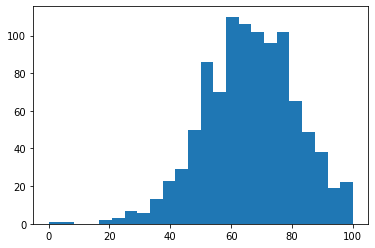

In [82]:
ploth = plt.hist(df["math score"], bins = 24)

##### "Reading score" histograma

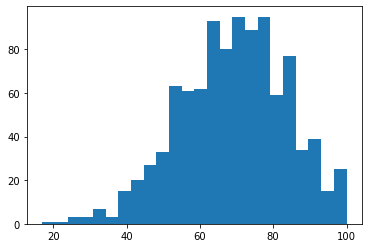

In [83]:
ploth = plt.hist(df["reading score"], bins = 24)

##### "Writing score" histograma

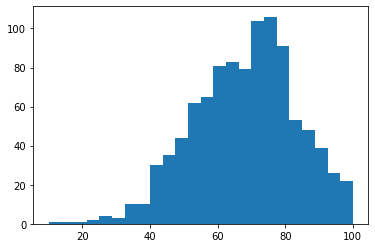

In [84]:
ploth = plt.hist(df["writing score"], bins = 24)

##### "Average score" histograma

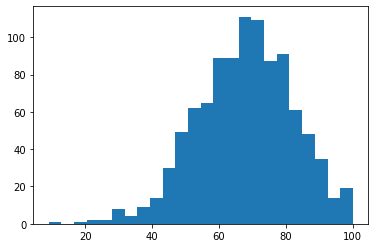

In [85]:
ploth = plt.hist(df["Average score"], bins = 24)

##### "Gender" histograma

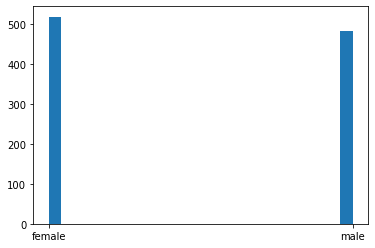

In [86]:
ploth = plt.hist(df["gender"], bins = 24)

##### "Race/ethnicity" histograma

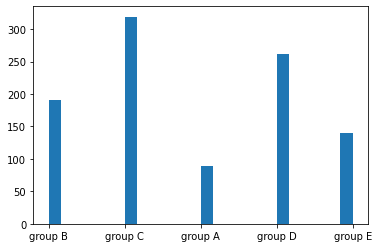

In [87]:
ploth = plt.hist(df["race/ethnicity"], bins = 24)

##### "Parental level of education" histograma

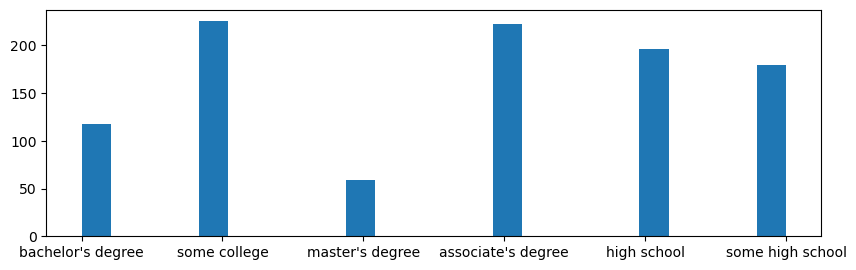

In [88]:
plt.figure(figsize=(10, 3), dpi=100)
ploth = plt.hist(df["parental level of education"], bins = 24)

##### "Lunch" histograma

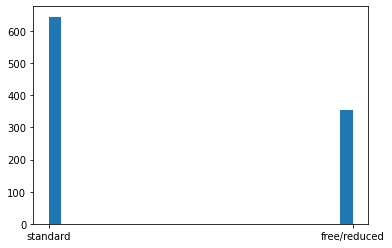

In [89]:
ploth = plt.hist(df["lunch"], bins = 24)

##### "Test preparation course" histograma

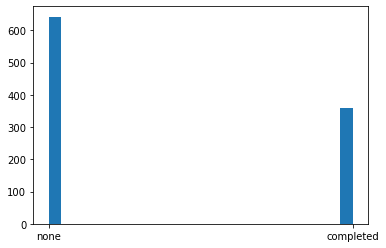

In [90]:
ploth = plt.hist(df["test preparation course"], bins = 24)

##### Tikriname triukšmus ir keičiame juos

In [91]:
triukdf = df.copy()
triukdf.loc[triukdf["math score"] < 0, "math score"] = triukdf.mode()
triukdf.loc[triukdf["math score"] > 100, "math score"] = triukdf.mode()
triukdf.loc[triukdf["reading score"] < 0, "reading score"] = triukdf.mode()
triukdf.loc[triukdf["reading score"] > 100, "reading score"] = triukdf.mode()
triukdf.loc[triukdf["writing score"] < 0, "writing score"] = triukdf.mode()
triukdf.loc[triukdf["writing score"] > 100, "writing score"] = triukdf.mode()

##### "Scatter plot" tipo diagramos

<AxesSubplot:xlabel='math score', ylabel='reading score'>

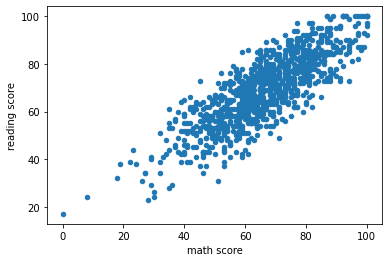

In [92]:
df.plot.scatter(x='math score', y='reading score')

<AxesSubplot:xlabel='math score', ylabel='writing score'>

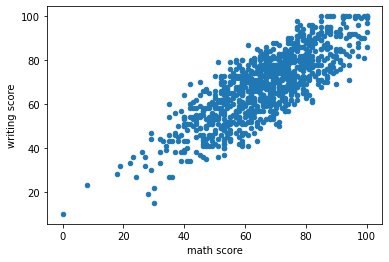

In [93]:
df.plot.scatter(x='math score', y='writing score')

<AxesSubplot:xlabel='math score', ylabel='Average score'>

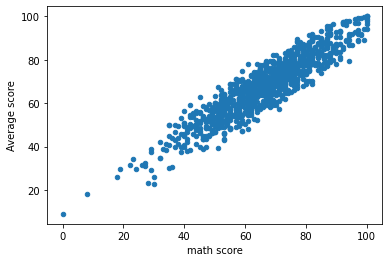

In [94]:
df.plot.scatter(x='math score', y='Average score')

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

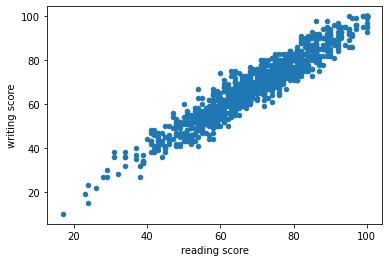

In [95]:
df.plot.scatter(x='reading score', y='writing score')

<AxesSubplot:xlabel='reading score', ylabel='Average score'>

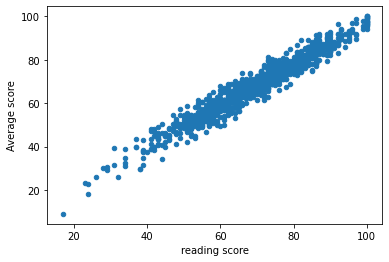

In [96]:
df.plot.scatter(x='reading score', y='Average score')

<AxesSubplot:xlabel='writing score', ylabel='Average score'>

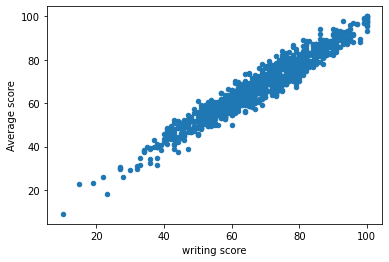

In [97]:
df.plot.scatter(x='writing score', y='Average score')

##### SPLOM diagrama

<function matplotlib.pyplot.show(close=None, block=None)>

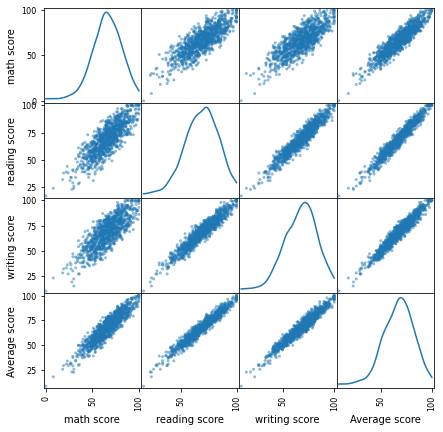

In [98]:
pd.plotting.scatter_matrix(df, figsize=(7,7), diagonal='kde')
plt.savefig('SPLOM.png', dpi=400)
plt.show

##### "Bar plot" tipo diagramos

Text(0.5, 1.0, 'Gender ir Test preparation course')

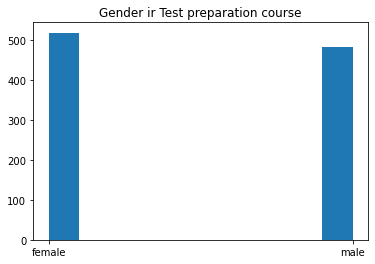

In [99]:
ploth = plt.hist(df["gender"])
plt.title('Gender ir Test preparation course')

Text(0.5, 1.0, 'None')

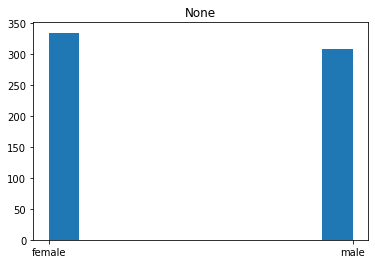

In [100]:
none = df.loc[df["test preparation course"] == "none"]
ploth = plt.hist(none["gender"])
plt.title('None')

Text(0.5, 1.0, 'Completed')

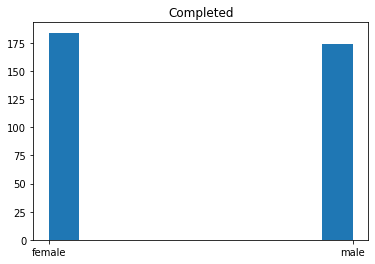

In [101]:
completed = df.loc[df["test preparation course"] == "completed"]
ploth = plt.hist(completed["gender"])
plt.title('Completed')

##### Sąryšių tarp kategorinio ir tolydžiojo tipo atributų diagramos

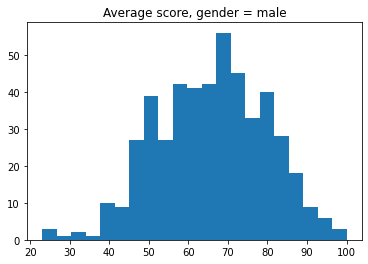

In [102]:
male = df.loc[df['gender'] == 'male']
plt.hist(male["Average score"], bins=21)
plt.title('Average score, gender = male')
plt.savefig('meanMale.png', dpi=200)

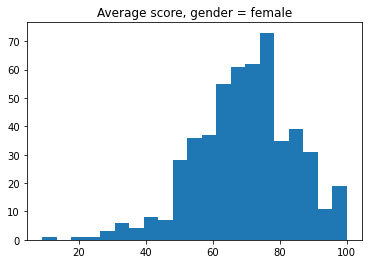

In [103]:
female = df.loc[df['gender'] == 'female']
plt.hist(female["Average score"], bins=21)
plt.title('Average score, gender = female')
plt.savefig('meanFemale.png', dpi=200)

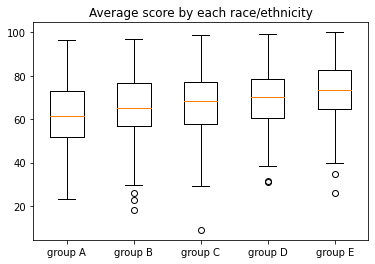

In [104]:
groups = df['race/ethnicity'].unique()
groups.sort()
z = []
for i in groups:
    a = df.loc[df['race/ethnicity'] == i]['Average score']
    z.append(a)

plt.boxplot(z, labels=groups)
plt.title('Average score by each race/ethnicity')
plt.savefig('boxMeanGroups.png', dpi=200)
plt.show()

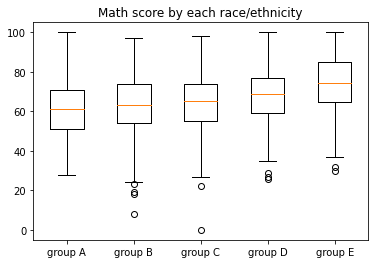

In [105]:
z = []
for i in groups:
    a = df.loc[df['race/ethnicity'] == i]['math score']
    z.append(a)
plt.boxplot(z, labels=groups)
plt.title('Math score by each race/ethnicity')
plt.savefig('boxMathGroups.png', dpi=200)
plt.show()

##### Skaičiuojame kovariaciją ir koreliaciją

In [106]:
df.cov()

,math score,reading score,writing score,Average score
math score,229.918998,180.998958,184.939133,198.618517
reading score,180.998958,213.165605,211.786661,201.983495
writing score,184.939133,211.786661,230.907992,209.211360
Average score,198.618517,201.983495,209.211360,203.270911


In [107]:
df.corr()

,math score,reading score,writing score,Average score
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
Average score,0.918744,0.970331,0.965669,1.000000


##### Koreliacijos matrica

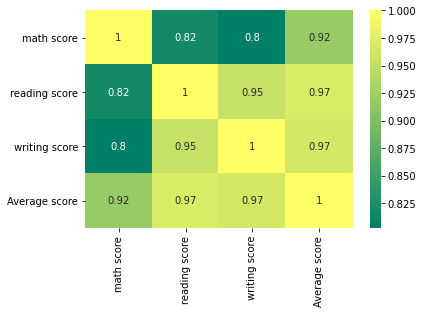

In [112]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True, cmap= 'summer')
plt.show()

##### Verčiame kategorinio tipo kintamuosius į tolydinio tipo kintamuosius

In [109]:
KategStulp = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
for i in KategStulp:
    unikalus = df[i].unique()
    nr = 0
    for j in unikalus:
        df.loc[df[i] == j, i] = nr
        nr = nr + 1
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,0,0,0,0,0,72,72,74,72.67
1,0,1,1,0,1,69,90,88,82.33
2,0,0,2,0,0,90,95,93,92.67
3,1,2,3,1,0,47,57,44,49.33
4,1,1,1,0,0,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,0,4,2,0,1,88,99,95,94.00
996,1,1,4,1,0,62,55,55,57.33
997,0,1,4,1,1,59,71,65,65.00
998,0,3,1,0,1,68,78,77,74.33


##### Normalizuojame duomenis

In [110]:
scaler = MinMaxScaler()
normal = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
normal

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
0,0.0,0.00,0.0,0.0,0.0,0.72,0.662651,0.711111,0.699670
1,0.0,0.25,0.2,0.0,1.0,0.69,0.879518,0.866667,0.805824
2,0.0,0.00,0.4,0.0,0.0,0.90,0.939759,0.922222,0.919451
3,1.0,0.50,0.6,1.0,0.0,0.47,0.481928,0.377778,0.443187
4,1.0,0.25,0.2,0.0,0.0,0.76,0.734940,0.722222,0.739890
...,...,...,...,...,...,...,...,...,...
995,0.0,1.00,0.4,0.0,1.0,0.88,0.987952,0.944444,0.934066
996,1.0,0.25,0.8,1.0,0.0,0.62,0.457831,0.500000,0.531099
997,0.0,0.25,0.8,1.0,1.0,0.59,0.650602,0.611111,0.615385
998,0.0,0.75,0.2,0.0,1.0,0.68,0.734940,0.744444,0.717912


In [111]:
normal.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.460750,0.537800,0.355000,0.358000,0.660890,0.628542,0.645044,0.645831
std,0.499926,0.342621,0.337231,0.478753,0.479652,0.151631,0.175906,0.168841,0.156674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.200000,0.000000,0.000000,0.570000,0.506024,0.530556,0.542088
50%,0.000000,0.250000,0.600000,0.000000,0.000000,0.660000,0.638554,0.655556,0.651978
75%,1.000000,0.750000,0.800000,1.000000,1.000000,0.770000,0.746988,0.766667,0.754615
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
